In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


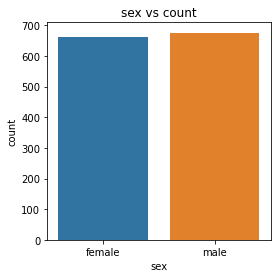

In [4]:
plt.figure(figsize=(4,4))
sns.countplot(x='sex', data=df)
plt.title('sex vs count')
plt.show()

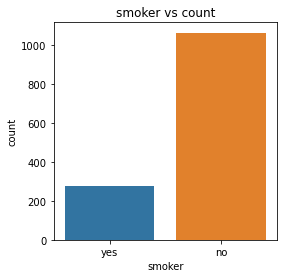

In [5]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoker', data=df)
plt.title('smoker vs count')
plt.show()

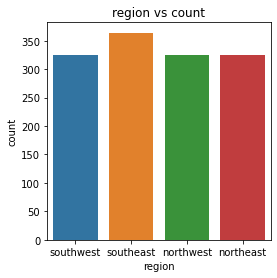

In [6]:
plt.figure(figsize=(4,4))
sns.countplot(x='region', data=df)
plt.title('region vs count')
plt.show()

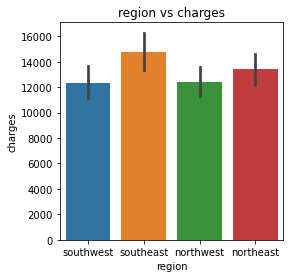

In [9]:
plt.figure(figsize=(4,4))
sns.barplot(x='region',y='charges', data=df)
plt.title('region vs charges')
plt.show()

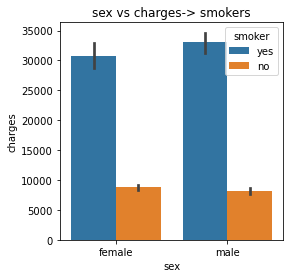

In [13]:
plt.figure(figsize=(4,4))
sns.barplot(x='sex',y='charges',hue='smoker' ,data=df)
plt.title('sex vs charges-> smokers')
plt.show()

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df['sex'] = df['sex'].replace({'male':0, 'female':1})
df['smoker'] = df['smoker'].replace({'yes':1, 'no':0})
df['region'] = df['region'].replace({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


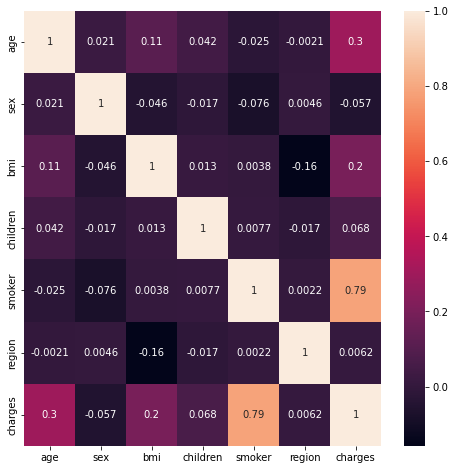

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [18]:
x = df.drop(['charges', 'sex'], axis=1)
y = df.charges

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)
                                                    
        

In [24]:
reg = LinearRegression()

In [27]:
reg.fit(x_train, y_train)
predict = reg.predict(x_test)

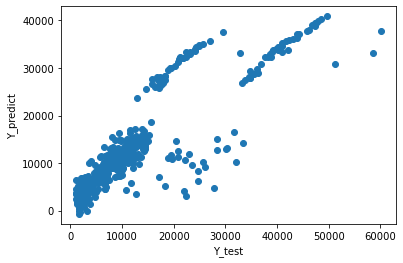

In [29]:
plt.scatter(y_test, predict)
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.show()

In [30]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cost_df = pd.DataFrame(data, index)
cost_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [31]:
cost_predict= reg.predict(cost_df)
print("The medical insurance costis ", cost_predict)

The medical insurance costis  [33538.93549556]


In [40]:
reg.coef_

array([  252.1649819 ,   315.37734632,   349.53622994, 24022.11385911,
         315.69496623])

In [41]:
reg.intercept_

-12306.323508844629

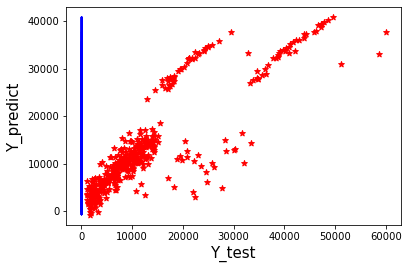

In [49]:
%matplotlib inline
plt.xlabel('Y_test',fontsize=15)
plt.ylabel('Y_predict',fontsize=15)
plt.scatter(y_test,predict,color='red',marker='*')
plt.plot(x_test,predict,color='blue')